**Run the following two cells before you begin.**

In [24]:
%autosave 10

Autosaving every 10 seconds


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

%matplotlib inline

**First, import the cleaned data set. Then, select the features from the DataFrame of the case study data.**
    
These features should be: `'LIMIT_BAL'`, `'EDUCATION'`, `'MARRIAGE'`, `'AGE'`, `'PAY_1'`, `'BILL_AMT1'`, `'BILL_AMT2'`, `'BILL_AMT3'`, `'BILL_AMT4'`, `'BILL_AMT5'`, `'BILL_AMT6'`, `'PAY_AMT1'`, `'PAY_AMT2'`, `'PAY_AMT3'`, `'PAY_AMT4'`, `'PAY_AMT5'`, AND `'PAY_AMT6'`.

In [26]:
# Import data set
df=pd.read_csv("cleaned_data.csv")
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26659,ecff42d0-bdc6,220000,1,3,1,39,0,0,0,0,...,5003,3047,5000,1000,0,high school,0,1,0,0
26660,99d1fa0e-222b,150000,1,3,2,43,-1,-1,-1,-1,...,8998,129,0,0,0,high school,0,1,0,0
26661,95cdd3e7-4f24,30000,1,2,2,37,4,3,2,-1,...,22000,4200,2000,3100,1,university,0,0,0,1
26662,00d03f02-04cd,80000,1,3,1,41,1,-1,0,0,...,1178,1926,52964,1804,1,high school,0,1,0,0


In [27]:
# Creafte features list
f_list = ['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


_____________________________________________________
**Next, make a 80:20 train/test split using a random seed of 24.**

In [28]:
X = df[f_list].values
y = df['default payment next month'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=24,test_size=0.2)
print(X_train.shape, y_train.shape)

(21331, 17) (21331,)


_____________________________________________________
**Then, instantiate the `MinMaxScaler` to scale the data.**

In [29]:
min_max_scaler = MinMaxScaler()

_____________________________________________________
**Next, instantiate a logistic regression model with the `saga` solver, L1 penalty, and set `max_iter` to 1,000 as we want the solver to have enough iterations to find a good solution.**

In [30]:
model = LogisticRegression(solver='saga', penalty='l1', max_iter=1000,tol=0.002)
model

LogisticRegression(max_iter=1000, penalty='l1', solver='saga', tol=0.002)

_____________________________________________________
**Next, import the `Pipeline` class and create a `Pipeline` with the scaler and the logistic regression model, using the names `'scaler'` and `'model'` for the steps, respectively.**

In [31]:
from sklearn.pipeline import Pipeline
scale_pipeline = Pipeline(steps=[('scaler',min_max_scaler), ('model',model)])

_____________________________________________________
**Now, use the `get_params` method to view the parameters from each stage of the pipeline.**

In [32]:
# Use `get_params`
scale_pipeline.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 LogisticRegression(max_iter=1000, penalty='l1', solver='saga',
                                    tol=0.002))])>

**Use the `set_params` method to change the the `model__C` parameter to 2.**

In [33]:
# View what `model__C` is set to currently
scale_pipeline.get_params()['model__C']


1.0

In [34]:
# Change `model__C` to 2
scale_pipeline.set_params(model__C=2)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 LogisticRegression(C=2, max_iter=1000, penalty='l1',
                                    solver='saga', tol=0.002))])

_____________________________________________________
**Then, create a smaller range of C values to test with cross-validation, as these models will take longer to train and test with more data than our previous activities.**

**Use C_vals = [$10^2$, $10$, $1$, $10^{-1}$, $10^{-2}$, $10^{-3}$].**


<details>
    <summary>Hint:</summary>
    Recall that exponents in Python use the ** operator.
</details>

In [35]:
c_val_exponents = np.linspace(2,-3,6)
c_val_exponents
C_vals = np.float(10)**c_val_exponents
C_vals

array([1.e+02, 1.e+01, 1.e+00, 1.e-01, 1.e-02, 1.e-03])

Now, define `k_folds` using `StratifiedKFold`. The number of folds should be 4. Set the random state to 1.

In [36]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
k_folds = StratifiedKFold(n_splits=4,random_state=1,shuffle = True)

_____________________________________________________
**Next, make a new version of the `cross_val_C_search` function, called `cross_val_C_search_pipe`. Instead of the model argument, this function will take a pipeline argument. The changes inside the function will be to set the `C` value using `set_params(model__C = <value you want to test>)` on the pipeline, replacing the model with the pipeline for the fit and `predict_proba` methods, and accessing the `C` value using `pipeline.get_params()['model__C']` for the printed status update.**

In [37]:
def cross_val_C_search_pipe(k_folds, C_vals,scale_lr,pipeline,X, y):
    n_folds = k_folds.n_splits
    cv_train_roc_auc = np.empty((n_folds, len(C_vals)))
    cv_test_roc_auc = np.empty((n_folds, len(C_vals)))
    cv_test_roc = [[]]*len(C_vals)
    for c_val_counter in range(len(C_vals)):
        model.C = C_vals[c_val_counter]
        fold_counter = 0
        for train_index, test_index in k_folds.split(X, y):
            X_cv_train, X_cv_test = X[train_index], X[test_index]
            y_cv_train, y_cv_test = y[train_index], y[test_index]
            model.fit(X_cv_train, y_cv_train)
            y_cv_train_predict_proba = model.predict_proba(X_cv_train)
            cv_train_roc_auc[fold_counter, c_val_counter] =roc_auc_score(y_cv_train, y_cv_train_predict_proba[:,1])
            y_cv_test_predict_proba = model.predict_proba(X_cv_test)
            cv_test_roc_auc[fold_counter, c_val_counter] = roc_auc_score(y_cv_test, y_cv_test_predict_proba[:,1])
            this_fold_roc = roc_curve(y_cv_test, y_cv_test_predict_proba[:,1])
            cv_test_roc[c_val_counter].append(this_fold_roc)
            #Incrementing the fold counter
            fold_counter += 1
        print('Done with C = {}'.format(model.C))
    return cv_train_roc_auc, cv_test_roc_auc, cv_test_roc

_____________________________________________________
**Now, run this function as in the previous activity, but using the new range of `C` values, the pipeline you created, and the features and response variable from the training split of the case study data.**

    You may see warnings here, or in later steps, about the non-convergence of the solver; you could experiment with the `tol` or `max_iter`` options to try and achieve convergence, although the results you obtain with `max_iter = 1000` are likely to be sufficient.

In [38]:
cv_train_roc_auc, cv_test_roc_auc, cv_test_roc =cross_val_C_search_pipe(k_folds, C_vals,scale_lr=min_max_scaler,pipeline=scale_pipeline, X=X_train,y=y_train)

Done with C = 100.0
Done with C = 10.0
Done with C = 1.0
Done with C = 0.1
Done with C = 0.01
Done with C = 0.001


_____________________________________________________
**Plot the average training and testing ROC AUC across folds, for each `np.log(C_vals)` value.**

Text(0.5, 1.0, 'Cross validation scores averaged over all folds')

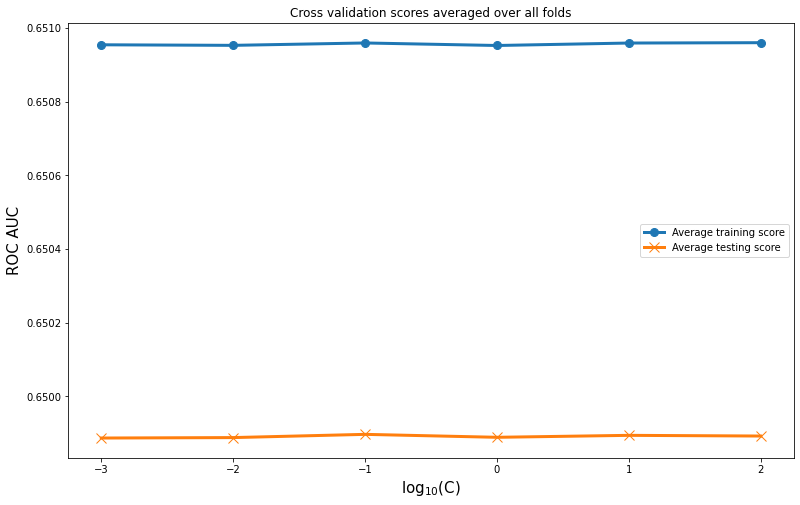

In [40]:
plt.figure(figsize=(13,8))
plt.plot(c_val_exponents, np.mean(cv_train_roc_auc, axis=0), '-o',label='Average training score',linewidth=3,markersize=8)
plt.plot(c_val_exponents, np.mean(cv_test_roc_auc, axis=0), '-x',label='Average testing score',linewidth=3,markersize=10)
plt.ylabel('ROC AUC',fontsize=15)
plt.xlabel('log$_{10}$(C)',fontsize=15)
plt.legend()
plt.title('Cross validation scores averaged over all folds')

_____________________________________________________
**Up next, create interaction features for the case study data using scikit-learn's `PolynomialFeatures`. You should use 2 as the degree of polynomial features. Confirm that the number of new features makes sense.**

In [41]:
from sklearn.preprocessing import PolynomialFeatures
interactions = PolynomialFeatures(degree=2, interaction_only=True,include_bias=False)


_____________________________________________________
**Finally, repeat the cross-validation procedure and observe the model performance now.**

In [42]:
# Using the new features, make a 80:20 train/test split using a random seed of 24.**
model_1 = LogisticRegression(solver='saga', penalty='l1', max_iter=1000,tol=0.002)
scale_pipeline_1 = Pipeline(steps=[('scaler',interactions), ('model',model_1)])


In [44]:
# Call the cross_val_C_search_pipe() function using the new training data.
# All other parameters should remain the same.
# Note that this training may take a few minutes due to the larger number of features.
cv_train_roc_auc1, cv_test_roc_auc1, cv_test_roc1 =cross_val_C_search_pipe(k_folds, C_vals,scale_lr=min_max_scaler,pipeline=scale_pipeline_1, X=X_train,y=y_train)

Done with C = 100.0
Done with C = 10.0
Done with C = 1.0
Done with C = 0.1
Done with C = 0.01
Done with C = 0.001


Text(0.5, 1.0, 'Average Cross Validation Score')

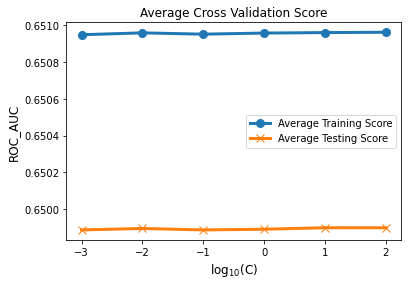

In [46]:
# Plot the average training and testing ROC AUC across folds, for each C value.
plt.plot(c_val_exponents, np.mean(cv_train_roc_auc1, axis=0), '-o',label='Average Training Score',linewidth=3,markersize=8)
plt.plot(c_val_exponents, np.mean(cv_test_roc_auc1, axis=0), '-x',label='Average Testing Score',linewidth=3,markersize=8)
plt.ylabel('ROC_AUC',fontsize=12)
plt.xlabel('log$_{10}$(C)',fontsize=12)
plt.legend()
plt.title('Average Cross Validation Score')

**Take a look at the above graph. Does the average cross-validation testing performance improve with the interaction features? Is regularization useful?**

##### -->Yes the average cross-validation testing performance is improving with the interation features.